In [339]:
import torch
print("Torch: ",torch.__version__)
import torchvision
print("Torchvision: ",torchvision.__version__)
import sklearn
print("sklearn: ",sklearn.__version__)

Torch:  1.0.0
Torchvision:  0.2.1
sklearn:  0.20.1


In [340]:
if torch.cuda.is_available():
    devID=torch.cuda.current_device()
    print("GPU: ",torch.cuda.get_device_name(devID))
else:
    print("Torch Cuda not avaialbe")

Torch Cuda not avaialbe


In [341]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [342]:
import pandas as pd 
import numpy as np 
import json

In [343]:
import os
PATH ='data/'
#PATH ="../input"
print(os.listdir(PATH))

['train.csv', 'data_description.txt', 'test.csv', 'sample_submission.csv']


In [344]:
train = pd.read_csv(PATH+'train.csv')
TEST = pd.read_csv(PATH+'test.csv')

In [345]:
train.shape

(1460, 81)

In [346]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [347]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [348]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [349]:
# set target columns and remove from training dataset
house_target_non_scaled = train.SalePrice
house_target_desc = 'SalePrice'

#house_predictors = train.copy()
#trainT = train.drop([house_target_desc], axis=1)
trainT = train.copy()

train_len = len(trainT)
house_predictors = pd.concat([trainT, TEST], ignore_index=True)
house_predictors.shape


/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


(2919, 81)

In [350]:
TEST.shape

(1459, 80)

In [351]:
#check if target has any missing values
house_target.isnull().values.any()

False

/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


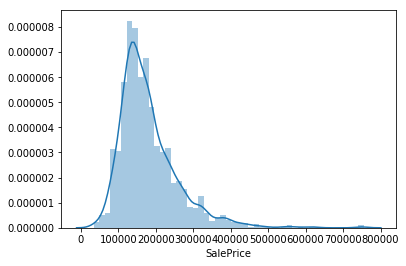

In [352]:
import seaborn as sns
%matplotlib inline
sns.distplot(house_target)

In [353]:
house_predictors.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


## Handling Missing Values

In [354]:
# check for any NaN values in dataset
house_predictors.isnull().values.any()

True

In [355]:
#assemble list of columns with missing values count > 0 (NaN)
missing_val_count_by_column = (house_predictors.isnull().sum())
missing_val_count_by_column=missing_val_count_by_column[missing_val_count_by_column > 0]
print(missing_val_count_by_column, "out of total dataset length:", len(house_predictors))

Alley           2721
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2348
FireplaceQu     1420
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
MiscFeature     2814
PoolQC          2909
SalePrice       1459
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64 out of total dataset length: 2919


In [356]:
# find columns with missing values and count how many
missing_val_count_by_column = (house_predictors.isnull().sum())
missing_val_count_by_column=missing_val_count_by_column[missing_val_count_by_column > 0]
missing_val_count_by_column = pd.DataFrame(missing_val_count_by_column)
#missing_val_count_by_column = missing_val_count_by_column.rename(columns={'0': 'Missing'}, inplace=True)
missing_val_count_by_column['Percentage'] = missing_val_count_by_column[0]/len(house_predictors)*100
missing_val_count_by_column.columns=['Missing Values', 'Percentage']
missing_val_count_by_column

,Missing Values,Percentage
Alley,2721,93.216855
BsmtCond,82,2.809181
BsmtExposure,82,2.809181
BsmtFinSF1,1,0.034258
BsmtFinSF2,1,0.034258
BsmtFinType1,79,2.706406
BsmtFinType2,80,2.740665
BsmtFullBath,2,0.068517
BsmtHalfBath,2,0.068517
BsmtQual,81,2.774923


In [357]:
missing_val_count_by_column.T.columns
house_predictors[missing_val_count_by_column.T.columns].head()

,Alley,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,...,LotFrontage,MSZoning,MasVnrArea,MasVnrType,MiscFeature,PoolQC,SalePrice,SaleType,TotalBsmtSF,Utilities
0,NaN,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,...,65.0,RL,196.0,BrkFace,NaN,NaN,208500.0,WD,856.0,AllPub
1,NaN,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,...,80.0,RL,0.0,None,NaN,NaN,181500.0,WD,1262.0,AllPub
2,NaN,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,...,68.0,RL,162.0,BrkFace,NaN,NaN,223500.0,WD,920.0,AllPub
3,NaN,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,...,60.0,RL,0.0,None,NaN,NaN,140000.0,WD,756.0,AllPub
4,NaN,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,...,84.0,RL,350.0,BrkFace,NaN,NaN,250000.0,WD,1145.0,AllPub


In [358]:
#Removing features with too many missing values, with % thresold
remove_columns = missing_val_count_by_column[missing_val_count_by_column.Percentage > 50.0]
remove_columns.T


,Alley,Fence,MiscFeature,PoolQC
Missing Values,2721.000000,2348.000000,2814.000000,2909.000000
Percentage,93.216855,80.438506,96.402878,99.657417


In [359]:
for cols in remove_columns.T.columns:
    #print(cols)
    house_predictors_shrunk = house_predictors.drop([cols], axis=1)
house_predictors_shrunk.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


### Identifying Categorical and Conditional variables

In [360]:
#Removing as they break fit loop: 'OverallQual','BsmtCond', 'Electrical','SaleType'

cat_vars = ['Id', 'MSSubClass', 'MSZoning', 'Street', 'LotShape','LandContour','Utilities','LotConfig',
           'LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallCond']
#             'YearBuilt', 'YearRemodAdd', 'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual',
#              'ExterCond','Foundation','BsmtQual','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Heating',
#              'HeatingQC','CentralAir', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
#              'BedroomAbvGr','KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd','Functional', 'Fireplaces',
#              'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars','GarageQual','GarageCond','PavedDrive',
#              'MoSold', 'YrSold','SaleCondition','OverallQual','BsmtCond','SaleType']

#reducing number of categorical and cont for quick analysis
#cat_vars = ['Id', 'MSSubClass', 'MSZoning', 'Street', 'LotShape','LandContour','Utilities','LotConfig','BsmtQual']

contin_vars = ['LotFrontage','LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
              '1stFlrSF','2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
              'EnclosedPorch','3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal']

#contin_vars = ['LotFrontage','LotArea', 'MasVnrArea']

house_target_desc = 'SalePrice'

In [361]:
house_predictors_shrunk[cat_vars].head(40).T
# item 39 of BsmQual is Nan

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Id,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
MSSubClass,60,20,60,70,60,50,20,60,50,190,...,70,20,20,20,120,60,20,20,20,90
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,C (all),RL,RL,RL,RL,RL,RL,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,...,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
LotShape,Reg,Reg,IR1,IR1,IR1,IR1,Reg,IR1,Reg,Reg,...,Reg,IR1,Reg,IR1,Reg,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,...,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,...,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,FR2,Inside,Corner,FR2,Inside,Inside,Corner,Inside,Corner,...,Inside,CulDSac,Corner,Inside,Inside,Inside,Corner,Inside,Inside,Inside
LandSlope,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,...,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,CollgCr,Veenker,CollgCr,Crawfor,NoRidge,Mitchel,Somerst,NWAmes,OldTown,BrkSide,...,IDOTRR,Sawyer,CollgCr,NAmes,NridgHt,NridgHt,CollgCr,NAmes,NAmes,Edwards


In [362]:
house_predictors_shrunk[contin_vars].head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
LotFrontage,65.0,80.0,68.0,60.0,84.0,85.0,75.0,NaN,51.0,50.0,70.0,85.0,NaN,91.0,NaN,51.0,NaN,72.0,66.0,70.0
LotArea,8450.0,9600.0,11250.0,9550.0,14260.0,14115.0,10084.0,10382.0,6120.0,7420.0,11200.0,11924.0,12968.0,10652.0,10920.0,6120.0,11241.0,10791.0,13695.0,7560.0
MasVnrArea,196.0,0.0,162.0,0.0,350.0,0.0,186.0,240.0,0.0,0.0,0.0,286.0,0.0,306.0,212.0,0.0,180.0,0.0,0.0,0.0
BsmtFinSF1,706.0,978.0,486.0,216.0,655.0,732.0,1369.0,859.0,0.0,851.0,906.0,998.0,737.0,0.0,733.0,0.0,578.0,0.0,646.0,504.0
BsmtFinSF2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BsmtUnfSF,150.0,284.0,434.0,540.0,490.0,64.0,317.0,216.0,952.0,140.0,134.0,177.0,175.0,1494.0,520.0,832.0,426.0,0.0,468.0,525.0
TotalBsmtSF,856.0,1262.0,920.0,756.0,1145.0,796.0,1686.0,1107.0,952.0,991.0,1040.0,1175.0,912.0,1494.0,1253.0,832.0,1004.0,0.0,1114.0,1029.0
1stFlrSF,856.0,1262.0,920.0,961.0,1145.0,796.0,1694.0,1107.0,1022.0,1077.0,1040.0,1182.0,912.0,1494.0,1253.0,854.0,1004.0,1296.0,1114.0,1339.0
2ndFlrSF,854.0,0.0,866.0,756.0,1053.0,566.0,0.0,983.0,752.0,0.0,0.0,1142.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LowQualFinSF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [363]:
### fill in missing values

In [364]:
# are there any missing values in our categorical columns
house_predictors_shrunk[cat_vars].isnull().values.any()

True

In [365]:
# are there any missing values in our continous columns
house_predictors_shrunk[contin_vars].isnull().values.any()

True

In [366]:
# fill in unknown NaN values for selected cont columns with MEAN
for column in contin_vars:
    #house_predictors[column] = house_predictors[column].fillna(0).astype('float32')
     house_predictors_shrunk[column] = house_predictors_shrunk[column].fillna(house_predictors_shrunk[column].mean()).astype('float32')

#test to make sure
house_predictors_shrunk[column].isnull().values.any()

False

In [367]:
house_predictors_shrunk[contin_vars].head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
LotFrontage,65.0,80.0,68.0,60.0,84.0,85.0,75.0,69.305794,51.0,50.0,70.0,85.0,69.305794,91.0,69.305794,51.0,69.305794,72.0,66.0,70.0
LotArea,8450.0,9600.0,11250.0,9550.0,14260.0,14115.0,10084.0,10382.000000,6120.0,7420.0,11200.0,11924.0,12968.000000,10652.0,10920.000000,6120.0,11241.000000,10791.0,13695.0,7560.0
MasVnrArea,196.0,0.0,162.0,0.0,350.0,0.0,186.0,240.000000,0.0,0.0,0.0,286.0,0.000000,306.0,212.000000,0.0,180.000000,0.0,0.0,0.0
BsmtFinSF1,706.0,978.0,486.0,216.0,655.0,732.0,1369.0,859.000000,0.0,851.0,906.0,998.0,737.000000,0.0,733.000000,0.0,578.000000,0.0,646.0,504.0
BsmtFinSF2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
BsmtUnfSF,150.0,284.0,434.0,540.0,490.0,64.0,317.0,216.000000,952.0,140.0,134.0,177.0,175.000000,1494.0,520.000000,832.0,426.000000,0.0,468.0,525.0
TotalBsmtSF,856.0,1262.0,920.0,756.0,1145.0,796.0,1686.0,1107.000000,952.0,991.0,1040.0,1175.0,912.000000,1494.0,1253.000000,832.0,1004.000000,0.0,1114.0,1029.0
1stFlrSF,856.0,1262.0,920.0,961.0,1145.0,796.0,1694.0,1107.000000,1022.0,1077.0,1040.0,1182.0,912.000000,1494.0,1253.000000,854.0,1004.000000,1296.0,1114.0,1339.0
2ndFlrSF,854.0,0.0,866.0,756.0,1053.0,566.0,0.0,983.000000,752.0,0.0,0.0,1142.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
LowQualFinSF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


In [368]:
# fill in unknown NaN values for selected cont columns with "missing"
for column in cat_vars:
    #house_predictors[column] = house_predictors[column].fillna(0).astype('float32')
     house_predictors_shrunk[column] = house_predictors_shrunk[column].fillna('missing').astype('object')

#test to make sure
house_predictors_shrunk[column].isnull().values.any()

False

In [369]:
house_predictors_shrunk[cat_vars].head(40).T
# item 39 of BsmQual NaN is changed to 'missing'

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Id,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
MSSubClass,60,20,60,70,60,50,20,60,50,190,...,70,20,20,20,120,60,20,20,20,90
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,C (all),RL,RL,RL,RL,RL,RL,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,...,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
LotShape,Reg,Reg,IR1,IR1,IR1,IR1,Reg,IR1,Reg,Reg,...,Reg,IR1,Reg,IR1,Reg,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,...,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,...,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,FR2,Inside,Corner,FR2,Inside,Inside,Corner,Inside,Corner,...,Inside,CulDSac,Corner,Inside,Inside,Inside,Corner,Inside,Inside,Inside
LandSlope,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,...,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,CollgCr,Veenker,CollgCr,Crawfor,NoRidge,Mitchel,Somerst,NWAmes,OldTown,BrkSide,...,IDOTRR,Sawyer,CollgCr,NAmes,NridgHt,NridgHt,CollgCr,NAmes,NAmes,Edwards


In [370]:
house_predictors_shrunk.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856.0,854.0,0.0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008
1,1262.0,0.0,0.0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007
2,920.0,866.0,0.0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008
3,961.0,756.0,0.0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006
4,1145.0,1053.0,0.0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008


In [371]:
# Assemble dataset with only selected cont and cat columns
#house_predictors_sml = house_predictors_shrunk[cat_vars+contin_vars+[house_target_desc]].copy()
house_predictors_sml = house_predictors_shrunk[cat_vars+contin_vars+[house_target_desc]].copy()
house_predictors_sml.head()

,Id,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,1710.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,208500.0
1,2,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,1262.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,181500.0
2,3,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,1786.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,223500.0
3,4,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,1717.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,140000.0
4,5,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,2198.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,250000.0


In [372]:
house_predictors_sml[contin_vars+[house_target_desc]].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,208500.0
1,80.0,9600.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,181500.0
2,68.0,11250.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,223500.0
3,60.0,9550.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,140000.0
4,84.0,14260.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,250000.0


In [373]:
pd.DataFrame(house_target).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
SalePrice    1460 non-null float32
dtypes: float32(1)
memory usage: 5.8 KB


In [374]:
meanT = house_target.mean(axis=0)
stdT = house_target.std(axis=0)
meanT, stdT

(180921.15625, 79442.5)

In [375]:
meanTrain = house_predictors_sml[contin_vars].mean(axis=0)
stdTrain =  house_predictors_sml[contin_vars].std(axis=0)
#meanTrain, stdTrain


In [376]:
house_predictors_sml[contin_vars].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,65.0,8450.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0
1,80.0,9600.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0
2,68.0,11250.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0
3,60.0,9550.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0
4,84.0,14260.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0


In [377]:
#scale with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
house_predictors_sml[contin_vars+[house_target_desc]] = pd.DataFrame(scaler.fit_transform(house_predictors_sml[contin_vars+[house_target_desc]]))

house_predictors_sml.head()

/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Id,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,-0.481537,-0.263441,-1.000000,-0.835580,-1.000000,-1.0,-1.0,-1.0,-1.0,-0.517845
1,2,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,-0.650339,-0.381720,-0.581461,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-0.592834
2,3,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,-0.452901,-0.182796,-1.000000,-0.886792,-1.000000,-1.0,-1.0,-1.0,-1.0,-0.476184
3,4,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,-0.478900,-0.137097,-1.000000,-0.905660,-0.462451,-1.0,-1.0,-1.0,-1.0,-0.708096
4,5,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,-0.297664,0.123656,-0.730337,-0.773585,-1.000000,-1.0,-1.0,-1.0,-1.0,-0.402583


In [378]:
house_predictors_sml.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'LotFrontage',
       'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
      dtype='object')

In [379]:
# split scaled target columns away from training

house_target_desc = 'SalePrice'
house_target = house_predictors_sml[house_target_desc]

house_predictors_sml = house_predictors_sml.drop([house_target_desc], axis=1)
house_predictors_sml.head()

,Id,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,1,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,-1.0,-0.481537,-0.263441,-1.000000,-0.835580,-1.000000,-1.0,-1.0,-1.0,-1.0
1,2,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,-1.0,-0.650339,-0.381720,-0.581461,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
2,3,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,-1.0,-0.452901,-0.182796,-1.000000,-0.886792,-1.000000,-1.0,-1.0,-1.0,-1.0
3,4,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,-1.0,-0.478900,-0.137097,-1.000000,-0.905660,-0.462451,-1.0,-1.0,-1.0,-1.0
4,5,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,-1.0,-0.297664,0.123656,-0.730337,-0.773585,-1.000000,-1.0,-1.0,-1.0,-1.0


In [380]:
#partition the Preprocessed Dataset Back into Train and Test Groups
# this will be used for model training and validation
train_processed = pd.concat([house_predictors_sml[:train_len]], axis=1)
house_target = house_target[:train_len]

# this will be used to generate the final submission
test_processed = house_predictors_sml[train_len:]

# confirm that the data looks correct
print(train_processed.shape, type(train_processed))
print(test_processed.shape, type(test_processed))
print(house_target.shape, type(house_target))

(1460, 34) <class 'pandas.core.frame.DataFrame'>
(1459, 34) <class 'pandas.core.frame.DataFrame'>
(1460,) <class 'pandas.core.series.Series'>


In [381]:
train_processed.head()

,Id,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,1,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,-1.0,-0.481537,-0.263441,-1.000000,-0.835580,-1.000000,-1.0,-1.0,-1.0,-1.0
1,2,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,-1.0,-0.650339,-0.381720,-0.581461,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
2,3,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,-1.0,-0.452901,-0.182796,-1.000000,-0.886792,-1.000000,-1.0,-1.0,-1.0,-1.0
3,4,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,-1.0,-0.478900,-0.137097,-1.000000,-0.905660,-0.462451,-1.0,-1.0,-1.0,-1.0
4,5,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,-1.0,-0.297664,0.123656,-0.730337,-0.773585,-1.000000,-1.0,-1.0,-1.0,-1.0


In [382]:
test_processed.head()

,Id,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
1460,1461,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,-1.0,-0.788244,-0.018817,-0.803371,-1.000000,-1.0,-1.0,-0.583333,-1.0,-1.000000
1461,1462,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,-1.0,-0.625094,-0.580645,-0.448034,-0.902965,-1.0,-1.0,-1.000000,-1.0,0.470588
1462,1463,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,-1.0,-0.512057,-0.352151,-0.702247,-0.908356,-1.0,-1.0,-1.000000,-1.0,-1.000000
1463,1464,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,-1.0,-0.521477,-0.368280,-0.494382,-0.902965,-1.0,-1.0,-1.000000,-1.0,-1.000000
1464,1465,120,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,...,-1.0,-0.643557,-0.319892,-1.000000,-0.778976,-1.0,-1.0,-0.500000,-1.0,-1.000000


In [383]:
## use non-scaled output version
house_target=house_target_non_scaled

In [384]:
# train_train, valid_train, train_test, valid_test = train_test_split(train_processed, house_target,
#                                                     train_size=0.95, random_state=42)
# train_processed.shape, train_train.shape, train_test.shape, valid_train.shape, valid_test.shape
len(house_target), type(house_target), house_target.head()

(1460, pandas.core.series.Series, 0    208500
 1    181500
 2    223500
 3    140000
 4    250000
 Name: SalePrice, dtype: int64)

In [385]:
## Spliting dataset
from sklearn.model_selection import train_test_split

# split train dataset into train and test
# X_train, X_test, y_train, y_test = train_test_split(train_train, train_test,
#                                                     train_size=0.7, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(train_processed, house_target,
                                                    train_size=0.8, random_state=42)
X_train.shape, y_train.shape

/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


((1168, 34), (1168,))

In [386]:
type(X_train), type(X_test), type(y_train), type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series)

In [387]:
y_train.head()

254     145000
1066    178000
638      85000
799     175000
380     127000
Name: SalePrice, dtype: int64

In [388]:
# #assign correct data types 
# for v in cat_vars:
#     X_train[v] = X_train[v].astype('category').cat.as_ordered()
#     X_test[v] = X_test[v].astype('category').cat.as_ordered()
#     test_processed[v] = test_processed[v].astype('category').cat.as_ordered()

    
for v in contin_vars:
    X_train[v] = X_train[v].astype('float32') 
    X_test[v] = X_test[v].astype('float32') 
    test_processed[v] = test_processed[v].astype('float32') 
    
house_target = house_target.astype('float32')  
y_train = y_train.astype('float32') 
y_test = y_test.astype('float32') 

#X_train[house_target_desc] = X_train[house_target_desc].astype('float32') 
    
house_predictors_sml.info()

/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 34 columns):
Id               2919 non-null object
MSSubClass       2919 non-null object
MSZoning         2919 non-null object
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallCond      2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null float64
MasVnrArea       2919 non-null float64
BsmtFinSF1       2919 non-null float64
BsmtFinSF2       2919 non-null float64
BsmtUnfSF        2919 non-null float64
TotalBsmtSF      2919 non-null float64
1stFlrSF         2919 non-null float64
2ndFlrSF   

## Scaling

In [389]:
# # Scale train data.
# mean = X_train[contin_vars].mean(axis=0)
# std = X_train[contin_vars].std(axis=0)
# X_train[contin_vars] = ( X_train[contin_vars] - mean ) / std
# X_train[contin_vars].head()

In [390]:
# # Scale test data.
# mean = X_test[contin_vars].mean(axis=0)
# std = X_test[contin_vars].std(axis=0)
# X_test[contin_vars] = ( X_test[contin_vars] - mean ) / std
# X_test[contin_vars].head()

In [391]:
# # Scale final test processed data.
# mean = test_processed[contin_vars].mean(axis=0)
# std = test_processed[contin_vars].std(axis=0)
# test_processed[contin_vars] = ( test_processed[contin_vars] - mean ) / std
# test_processed[contin_vars].head()

In [392]:
# #scale train and test target
# y_train = ( y_train - meanT ) / stdT
# y_test = ( y_test - meanT ) / stdT

In [393]:
#Convert cat variables to one-hot-encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for cat_col in cat_vars:
    label_encoders[cat_col] = LabelEncoder()
    X_train[cat_col] = label_encoders[cat_col].fit_transform(X_train[cat_col].astype(str))
    X_test[cat_col] = label_encoders[cat_col].fit_transform(X_test[cat_col].astype(str))
    test_processed[cat_col] = label_encoders[cat_col].fit_transform(test_processed[cat_col].astype(str))
#    X_train[cat_col] = label_encoders[cat_col].fit_transform(X_train[cat_col])
#    X_test[cat_col] = label_encoders[cat_col].fit_transform(X_test[cat_col])

/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [394]:
type(X_train), type(test_processed), type(X_test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

In [395]:
from torch.utils.data import Dataset, DataLoader
class TabularDataset(Dataset):
  def __init__(self, data,target_data, cat_cols=None):
    self.n = data.shape[0]

    self.y =  target_data.astype(np.float32).values

    self.cat_cols = cat_cols if cat_cols else []
    self.cont_cols = [col for col in data.columns
                          if col not in self.cat_cols]

    if self.cont_cols:
      self.cont_X = data[self.cont_cols].astype(np.float32).values
    else:
      self.cont_X = np.zeros((self.n, 1))

    if self.cat_cols:
      self.cat_X = data[cat_cols].astype(np.int64).values
    else:
      self.cat_X =  np.zeros((self.n, 1))

  def __len__(self):
    """
    Denotes the total number of samples.
    """
    return self.n

  def __getitem__(self, idx):
    """
    Generates one sample of data.
    """
    return [self.y[idx], self.cont_X[idx], self.cat_X[idx]]

In [396]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FeedForwardNN(nn.Module):

  def __init__(self, emb_dims, no_of_cont, lin_layer_sizes,
               output_size, emb_dropout, lin_layer_dropouts):
    super().__init__()

    # Embedding layers
    self.emb_layers = nn.ModuleList([nn.Embedding(x, y) for x, y in emb_dims])

    no_of_embs = sum([y for x, y in emb_dims])
    self.no_of_embs = no_of_embs
    self.no_of_cont = no_of_cont

    # Linear Layers
    first_lin_layer = nn.Linear(self.no_of_embs + self.no_of_cont,
                                lin_layer_sizes[0])

    self.lin_layers =\
     nn.ModuleList([first_lin_layer] +\
          [nn.Linear(lin_layer_sizes[i], lin_layer_sizes[i + 1])
           for i in range(len(lin_layer_sizes) - 1)])
    
    for lin_layer in self.lin_layers:
      nn.init.kaiming_normal_(lin_layer.weight.data)

    # Output Layer
    self.output_layer = nn.Linear(lin_layer_sizes[-1],
                                  output_size)
    nn.init.kaiming_normal_(self.output_layer.weight.data)

    # Batch Norm Layers
    self.first_bn_layer = nn.BatchNorm1d(self.no_of_cont)
    self.bn_layers = nn.ModuleList([nn.BatchNorm1d(size)
                                    for size in lin_layer_sizes])

    # Dropout Layers
    self.emb_dropout_layer = nn.Dropout(emb_dropout)
    self.droput_layers = nn.ModuleList([nn.Dropout(size)
                                  for size in lin_layer_dropouts])

  def forward(self, cont_data, cat_data):

    if self.no_of_embs != 0:
      x = [emb_layer(cat_data[:, i])
           for i,emb_layer in enumerate(self.emb_layers)]
      x = torch.cat(x, 1)
      x = self.emb_dropout_layer(x)

    if self.no_of_cont != 0:
      normalized_cont_data = self.first_bn_layer(cont_data)

      if self.no_of_embs != 0:
        x = torch.cat([x, normalized_cont_data], 1) 
      else:
        x = normalized_cont_data

    for lin_layer, dropout_layer, bn_layer in\
        zip(self.lin_layers, self.droput_layers, self.bn_layers):
      
      x = F.relu(lin_layer(x))
      x = bn_layer(x)
      x = dropout_layer(x)

    x = self.output_layer(x)

    return x

In [397]:
def emb_init(x):
    x = x.weight.data
    sc = 2/(x.size(1)+1)
    x.uniform_(-sc,sc)

In [398]:
class MixedInputModel(nn.Module):
    def __init__(self, emb_szs, n_cont, emb_drop, out_sz, szs, drops, y_range, use_bn=True):
        super().__init__()
        for i,(c,s) in enumerate(emb_szs): assert c > 1, f"cardinality must be >=2, got emb_szs[{i}]: ({c},{s})"
        self.embs = nn.ModuleList([nn.Embedding(c, s) for c,s in emb_szs])
        for emb in self.embs: emb_init(emb)
        n_emb = sum(e.embedding_dim for e in self.embs)
        self.n_emb, self.n_cont=n_emb, n_cont
        
        szs = [n_emb+n_cont] + szs
        self.lins = nn.ModuleList([nn.Linear(szs[i], szs[i+1]) for i in range(len(szs)-1)])
        self.bns = nn.ModuleList([nn.BatchNorm1d(sz) for sz in szs[1:]])
        for o in self.lins: nn.init.kaiming_normal_(o.weight.data)
        self.outp = nn.Linear(szs[-1], out_sz)
        nn.init.kaiming_normal_(self.outp.weight.data)

        self.emb_drop = nn.Dropout(emb_drop)
        self.drops = nn.ModuleList([nn.Dropout(drop) for drop in drops])
        self.bn = nn.BatchNorm1d(n_cont)
        self.use_bn,self.y_range = use_bn,y_range

#    def forward(self, x_cat, x_cont):
    def forward(self, x_cont, x_cat):
        if self.n_emb != 0:
            x = [e(x_cat[:,i]) for i,e in enumerate(self.embs)]
            x = torch.cat(x, 1)
            x = self.emb_drop(x)
        if self.n_cont != 0:
            x2 = self.bn(x_cont)
            x = torch.cat([x, x2], 1) if self.n_emb != 0 else x2
        for l,d,b in zip(self.lins, self.drops, self.bns):
            x = F.relu(l(x))
            if self.use_bn: x = b(x)
            x = d(x)
        x = self.outp(x)
        if self.y_range:
            x = torch.sigmoid(x)
            x = x*(self.y_range[1] - self.y_range[0])
            x = x+self.y_range[0]
        return x.squeeze()
    


In [399]:
def fit(model, train_dl, val_dl, loss_fn, opt, scheduler, epochs=3):
    num_batch = len(train_dl)
    for epoch in tnrange(epochs):      
        y_true_train = list()
        y_pred_train = list()
        total_loss_train = 0          

        t = tqdm_notebook(iter(train_dl), leave=False, total=num_batch)
        for cat, cont, y in t:
#             cat = cat.cuda()
#             cont = cont.cuda()
#             y = y.cuda()
            cat = cat.to(device)
            cont = cont.to(device)
            y = y.to(device)

            t.set_description(f'Epoch {epoch}')

            opt.zero_grad()
            pred = model(cat, cont)
            loss = loss_fn(pred, y)
            loss.backward()
            lr[epoch].append(opt.param_groups[0]['lr'])
            tloss[epoch].append(loss.item())
            scheduler.step()
            opt.step()

            t.set_postfix(loss=loss.item())

            y_true_train += list(y.cpu().data.numpy())
            y_pred_train += list(pred.cpu().data.numpy())
            total_loss_train += loss.item()

        train_acc = rmse(y_true_train, y_pred_train)
        train_loss = total_loss_train/len(train_dl)

        if val_dl:
            y_true_val = list()
            y_pred_val = list()
            total_loss_val = 0
            for cat, cont, y in tqdm_notebook(val_dl, leave=False):
#                 cat = cat.cuda()
#                 cont = cont.cuda()
#                 y = y.cuda()
                cat = cat.to(device)
                cont = cont.to(device)
                y = y.to(device)
                pred = model(cat, cont)
                loss = loss_fn(pred, y)

                y_true_val += list(y.cpu().data.numpy())
                y_pred_val += list(pred.cpu().data.numpy())
                total_loss_val += loss.item()
                vloss[epoch].append(loss.item())
            valacc = rmse(y_true_val, y_pred_val)
            valloss = total_loss_val/len(valdl)
            print(f'Epoch {epoch}: train_loss: {train_loss:.4f} train_rmse: {train_acc:.4f} | val_loss: {valloss:.4f} val_rmse: {valacc:.4f}')
        else:
            print(f'Epoch {epoch}: train_loss: {train_loss:.4f} train_rmse: {train_acc:.4f}')

    return lr, tloss, vloss    

In [400]:
#count unique values in test and train caterical
cat_dims_train=[int(X_train[col].nunique()) for col in cat_vars]
#cat_dims_test = [int(X_test[col].nunique()) for col in cat_vars]

cat_dims_trainFull = [[int(X_train[col].nunique()),col] for col in cat_vars]
cat_dims_trainFull

[[1168, 'Id'],
 [15, 'MSSubClass'],
 [5, 'MSZoning'],
 [2, 'Street'],
 [4, 'LotShape'],
 [4, 'LandContour'],
 [2, 'Utilities'],
 [5, 'LotConfig'],
 [3, 'LandSlope'],
 [25, 'Neighborhood'],
 [9, 'Condition1'],
 [8, 'Condition2'],
 [5, 'BldgType'],
 [8, 'HouseStyle'],
 [9, 'OverallCond']]

In [401]:
# calculate embedding dimmenstions
emb_dims = [(x, min(50, (x + 8) // 2)) for x in cat_dims_train]

In [402]:
# instantiating TabularDataset class

# Pytorch abstract class representing a Dataset.
#All other datasets should subclass it. All subclasses should override
#``__len__``, that provides the size of the dataset, and ``__getitem__``,

train_dataset = TabularDataset(data=X_train, target_data=y_train, cat_cols=cat_vars)
test_dataset = TabularDataset(data=X_test, target_data=y_test, cat_cols=cat_vars)

In [403]:
batchsize = 32
train_dataloader = DataLoader(train_dataset, batchsize, shuffle=True, num_workers=4)
test_dataloader = DataLoader(test_dataset, batchsize, shuffle=True, num_workers=4)

In [404]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [405]:
y_range = (0, y_train.max()*1.2)
y_range

(0, 894000.0)

In [406]:
# model = FeedForwardNN(emb_dims, no_of_cont=len(train_dataset.cont_cols), 
#                       lin_layer_sizes=[300, 600],
#                       output_size=1, emb_dropout=0.04,
#                       lin_layer_dropouts=[0.001,0.01])



model = MixedInputModel(emb_szs=emb_dims, 
                    n_cont=len(train_dataset.cont_cols), 
                    emb_drop=0.04, 
                    out_sz=1, 
                    szs=[1000,500,250], 
                    drops=[0.001,0.01,0.01], 
                    y_range=y_range)

model = model.to(device)
model

MixedInputModel(
  (embs): ModuleList(
    (0): Embedding(1168, 50)
    (1): Embedding(15, 11)
    (2): Embedding(5, 6)
    (3): Embedding(2, 5)
    (4): Embedding(4, 6)
    (5): Embedding(4, 6)
    (6): Embedding(2, 5)
    (7): Embedding(5, 6)
    (8): Embedding(3, 5)
    (9): Embedding(25, 16)
    (10): Embedding(9, 8)
    (11): Embedding(8, 8)
    (12): Embedding(5, 6)
    (13): Embedding(8, 8)
    (14): Embedding(9, 8)
  )
  (lins): ModuleList(
    (0): Linear(in_features=173, out_features=1000, bias=True)
    (1): Linear(in_features=1000, out_features=500, bias=True)
    (2): Linear(in_features=500, out_features=250, bias=True)
  )
  (bns): ModuleList(
    (0): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): BatchNorm1d(250, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (outp): Linear(in_features=250, out_features=1, bias=True

In [407]:
from collections import defaultdict
vloss = defaultdict(list)
tloss = defaultdict(list)

In [408]:
from torch.optim import lr_scheduler
no_of_epochs = 50
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
lr_cosine = lr_scheduler.CosineAnnealingLR(optimizer, 1000)

In [409]:
from sklearn.metrics import mean_squared_error

def inv_y(y): return np.exp(y)

def rmse(targ, y_pred):
    return np.sqrt(mean_squared_error(inv_y(y_pred), inv_y(targ))) #.detach().numpy()

In [410]:
from tqdm import tqdm, tqdm_notebook, tnrange
tqdm.pandas(desc='Progress')

In [411]:
#lr, tloss, vloss = fit(model=model, train_dl=train_dataloader, val_dl=test_dataloader, loss_fn=criterion, opt=optimizer, scheduler=lr_cosine, epochs=10)

In [412]:
import os
import time
import copy

since = time.time()

best_model_wts = copy.deepcopy(model.state_dict())
best_acc = 0.0
best_tst_loss = 1e20
train_losses, test_losses = [],[]
train_rmse, test_rmse = [],[]

for epoch in range(no_of_epochs):
    running_loss = 0.0
    running_train_corrects = 0.0
    
    y_true_train = list()
    y_pred_train = list()
    total_loss_train = 0   
    
    # TRAINING PHASE
    i=0
    #print('Epoch {}/{}'.format(epoch, no_of_epochs - 1))
    model.train()  # Set model to training mode
    pid = os.getpid()
    for y, cont_x, cat_x in train_dataloader:
        i += 1
        cat_x = cat_x.to(device)
        cont_x = cont_x.to(device)
        y  = y.to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # Forward Pass
        preds = model(cont_x, cat_x)
        loss = criterion(preds, y)
        tloss[i].append(loss.item())
        #loss2 = torch.sqrt(criterion(torch.log(preds), torch.log(y)))
        #print(loss.item(), loss2.item())
        
        # Backward Pass and Optimization
        loss.backward()
        optimizer.step()
        
        # statistics
        running_loss += loss.item() * cat_x.size(0)  #multiple by batch size
        #running_loss += loss.item()  
        
        y_true_train += list(y.data.numpy())
        y_pred_train += list(preds.data.numpy())
        total_loss_train += loss.item()
        
        #running_train_corrects += torch.sum(preds == y.data).float()
        #print(running_loss)
        
        # print statistics
        #if i % 1000:    # print every n mini-batches         
         #   print('{}\tTrain Epoch: {} [{}/{} ({:.0f}%)] Loss: {:.4f}'.format(
        #        pid, epoch, i * len(cat_x), len(dataloader.dataset),
        #        100. * i / len(dataloader), loss.item()))
    
#    train_acc = rmse(y_true_train, y_pred_train)
    train_loss = total_loss_train/len(train_dataset)
    # TESTING PHASE
    model.eval()   # Set model to evaluate mode
    y_true_val = list()
    y_pred_val = list()
    total_loss_val = 0
    running_corrects = 0
    test_loss = 0
    test_loss2 = 0
    correct = 0
    i = 0
    for y, cont_x, cat_x in test_dataloader:
        #print("1",cont_x.shape, cat_x.shape, type(cont_x), type(cat_x))
        i += 1
        cat_x = cat_x.to(device)
        cont_x = cont_x.to(device)
        y  = y.to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        #print("2",cont_x.shape, cat_x.shape, type(cont_x), type(cat_x))
        
        #with torch.set_grad_enabled(False):
        with torch.no_grad():
            preds = model(cont_x, cat_x)
            loss = criterion(preds, y)
            #test_loss = torch.sqrt(criterion(torch.log(preds), torch.log(y)))
            #test_loss += torch.sqrt(criterion(torch.log(preds), torch.log(y)))
            #print(test_loss)
            #print(preds[0],y[0])
        
        #test_loss2 += F.nll_loss(preds, y, reduction='sum').item() # sum up batch loss
        #test_loss2  = 0
        #prd = preds.max(1)[1] # get the index of the max log-probability
        #correct += prd.eq(y).sum().item()
        y_true_val += list(y.data.numpy())
        y_pred_val += list(preds.data.numpy())
        total_loss_val += loss.item()
        vloss[i].append(loss.item())
                
        #running_corrects += torch.sum(preds == y.data).float()
        #running_corrects+=accuracy_score(y, preds)*100
        test_loss += loss.item() * cat_x.size(0)   #cat_x.zize(0) - batch size of 64=   
        #print("batch:",cat_x.size(0))
    
    epoch_train_loss = running_loss / len(train_dataset)
    #epoch_train_loss = running_loss / cat_x.size(0)
    #epoch_train_acc = running_train_corrects / len(train_dataset)
    
    #epoch_acc = running_corrects.double() / len(test_dataset)
    epoch_test_loss = test_loss / len(test_dataset)
    #epoch_test_loss = test_loss
    
#    valacc = rmse(y_true_val, y_pred_val)
    valloss = total_loss_val/len(test_dataset)
    #print("test_loss2", test_loss2/ len(test_dataloader.dataset))
    #print( 'Accuracy: {}/{}'.format(correct, len(test_dataloader.dataset)))
    
    #epoch_loss = running_loss / dataset_sizes[phase]
    #epoch_acc = running_corrects.double() / dataset_sizes[phase]
    
    # deep copy the model
    if epoch_test_loss < best_tst_loss:
        best_tst_loss = epoch_test_loss
        best_model_wts = copy.deepcopy(model.state_dict())
        # this idea didn't work
 #   else: #always start new epoch with lowest loss
 #       model.load_state_dict(best_model_wts)
    
    train_losses.append(epoch_train_loss)
    test_losses.append(epoch_test_loss)
#    train_rmse.append(train_acc)
#    test_rmse.append(valacc)
    
    
#    print('Epoch {}/{}, Train Loss: {:.6f}, Train Acc:{:.6f}, Test Loss: {:.6f} Acc: {:.6f}'.
#           format(epoch, no_of_epochs - 1, epoch_train_loss, epoch_train_acc, epoch_test_loss, epoch_acc))
    print('Epoch {}/{}, Train Loss: {:.6f}, Test Loss: {:.6f}'.
           format(epoch, no_of_epochs - 1, epoch_train_loss, epoch_test_loss))
#    print(f'Epoch {epoch}/{no_of_epochs-1}, TrainMSE: {epoch_train_loss:.4f}, TestMSE: {epoch_test_loss:.4f}, train_loss:{train_loss:.4f}, train_rmse:{train_acc:.4f}, val_loss:{valloss:.4f},val_rmse:{valacc:.4f}')
# load best model weights
model.load_state_dict(best_model_wts)
print("Best Test Loss: ", best_tst_loss)

Epoch 0/49, Train Loss: 60407970493.369865, Test Loss: 15391974098.410959
Epoch 1/49, Train Loss: 15891969437.808220, Test Loss: 5686831195.178082
Epoch 2/49, Train Loss: 3928169128.328767, Test Loss: 2478264668.931507
Epoch 3/49, Train Loss: 2853652781.589041, Test Loss: 2882560096.000000
Epoch 4/49, Train Loss: 2002741199.780822, Test Loss: 2402425042.410959
Epoch 5/49, Train Loss: 1956344037.698630, Test Loss: 1954395732.164384
Epoch 6/49, Train Loss: 1513210809.863014, Test Loss: 2290246038.136986
Epoch 7/49, Train Loss: 1319938560.000000, Test Loss: 2000591196.931507
Epoch 8/49, Train Loss: 1340140992.000000, Test Loss: 1796494791.890411
Epoch 9/49, Train Loss: 1337403316.602740, Test Loss: 1939828840.219178
Epoch 10/49, Train Loss: 1164847487.123288, Test Loss: 1700754898.410959
Epoch 11/49, Train Loss: 1197704184.109589, Test Loss: 2136568202.520548
Epoch 12/49, Train Loss: 1266576455.890411, Test Loss: 2334455381.041096
Epoch 13/49, Train Loss: 1201767991.232877, Test Loss: 225

In [413]:
import matplotlib.pyplot as plt
%matplotlib inline

In [414]:
# t = [np.mean(tloss[el]) for el in tloss]
# v = [np.mean(vloss[el]) for el in vloss]

# plt.plot(t,label = "Train losses")
# plt.plot(v, label = "Test losses")
# plt.legend()

# p = pd.DataFrame({'Train Loss': t, 'Validation Loss': v, 'Epochs': range(40)})


# _ = p.plot(x='Epochs', y=['Train Loss', 'Validation Loss'], 
#            title='Train and Validation Loss over Epochs')

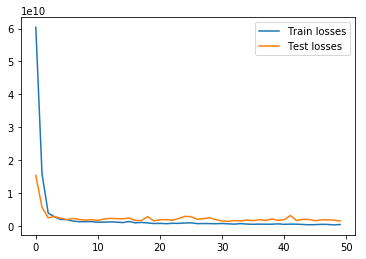

In [415]:
plt.plot(train_losses,label = "Train losses")
plt.plot(test_losses, label = "Test losses")
plt.legend()

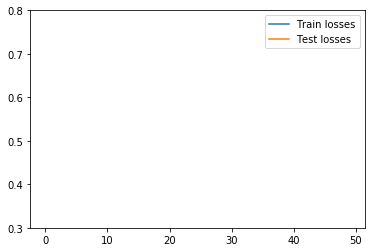

In [416]:
 plt.ylim(bottom=0.3,top=0.8)
plt.plot(train_losses,label = "Train losses")
plt.plot(test_losses, label = "Test losses")
plt.legend()

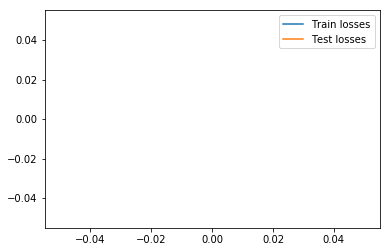

In [417]:
# plt.ylim(bottom=0.6e10,top=0.75e10)
#lt.ylim(bottom=0.997,top=1.007)
plt.plot(train_rmse,label = "Train losses")
plt.plot(test_rmse, label = "Test losses")
plt.legend()

In [423]:
test_processed.shape, type(test_processed)

((1459, 34), pandas.core.frame.DataFrame)

In [424]:
cont_Y = torch.from_numpy(test_processed[contin_vars].astype(np.float32).values).to(device)
cat_Y = torch.from_numpy(test_processed[cat_vars].astype(np.int64).values).to(device)

In [425]:
len(cont_Y), len(cat_Y), cont_Y[[0]].shape

(1459, 1459, torch.Size([1, 19]))

In [426]:
# model.eval()
# model = model.to(device)
# with torch.no_grad():
#     output = model.forward(cont_Y,cat_Y)
#     #output.to(device)
#     print(i, output)
#     print(type(output))

In [427]:
prices = []
model.eval()
model = model.to(device)
for i in range(0,len(cont_Y)):
#     cat_data.to(device)
#     cont_data.to(device)
    with torch.no_grad():
        output = model.forward(cont_Y[[i]],cat_Y[[i]])
        #output.to(device)
        print(i, output)
        print(type(output))
        prices.append(output.numpy())

0 tensor(128651.8125)
<class 'torch.Tensor'>
1 tensor(170166.6875)
<class 'torch.Tensor'>
2 tensor(195256.5469)
<class 'torch.Tensor'>
3 tensor(172133.7500)
<class 'torch.Tensor'>
4 tensor(205509.3438)
<class 'torch.Tensor'>
5 tensor(188328.8438)
<class 'torch.Tensor'>
6 tensor(150031.1406)
<class 'torch.Tensor'>
7 tensor(171308.3594)
<class 'torch.Tensor'>
8 tensor(170866.0312)
<class 'torch.Tensor'>
9 tensor(122489.5859)
<class 'torch.Tensor'>
10 tensor(190275.2812)
<class 'torch.Tensor'>
11 tensor(106536.5156)
<class 'torch.Tensor'>
12 tensor(105816.4531)
<class 'torch.Tensor'>
13 tensor(180226.7969)
<class 'torch.Tensor'>
14 tensor(107393.3281)
<class 'torch.Tensor'>
15 tensor(333569.8125)
<class 'torch.Tensor'>
16 tensor(249837.7500)
<class 'torch.Tensor'>
17 tensor(277596.4062)
<class 'torch.Tensor'>
18 tensor(220752.4531)
<class 'torch.Tensor'>
19 tensor(555552.3750)
<class 'torch.Tensor'>
20 tensor(360736.5000)
<class 'torch.Tensor'>
21 tensor(197995.5469)
<class 'torch.Tensor'

RuntimeError: index out of range at /opt/conda/conda-bld/pytorch-cpu_1544218667092/work/aten/src/TH/generic/THTensorEvenMoreMath.cpp:191

In [428]:
#scaler.inverse_transform(prices)
pd.DataFrame(prices)


,0
0,128651.812500
1,170166.687500
2,195256.546875
3,172133.750000
4,205509.343750
5,188328.843750
6,150031.140625
7,171308.359375
8,170866.031250
9,122489.585938


In [ ]:
stdT, meanT

In [ ]:
ScaledPrices = pd.DataFrame(prices) * stdT + meanT
ScaledPrices

In [ ]:
cont_loader=torch.utils.data.DataLoader(cont_Y, batch_size=1, shuffle=False, num_workers=1)
cat_loader=torch.utils.data.DataLoader(cat_Y, batch_size=1, shuffle=False, num_workers=1)

In [ ]:
i=0
for  cat_data, cont_data in zip(cat_loader,cont_loader):
    i+=1
    cat_data.to(device)
    cont_data.to(device)
    print(cont_data.shape, cat_data.shape)
    print(cont_data)
    model.eval()
    model = model.to(device)
    with torch.no_grad():
        output = model.forward(cont_data,cat_data)
        #output.to(device)
        print(output)
        print(i,type(output))

In [ ]:
with torch.no_grad():
    model.eval()
    output = model.forward(cont_Y,cat_Y)

output.shape

In [ ]:
output

In [ ]:
stdT,meanT

In [ ]:
out=output.numpy()

In [ ]:
out2 = out * stdT + meanT
out2

In [ ]:
out2.shape

In [ ]:
type(test_processed.Id)

In [ ]:
output3 = pd.DataFrame({'Id': test_processed.Id[1:32].index,
                       'SalePrice': out2.flatten()})

In [ ]:
output3

In [ ]:
output3.to_csv('submission.csv', index=False)